In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# View all of the classes that automap found
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the dow class to a variable called `Dow`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [16]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23')

In [47]:
# date 1 week 365 days ago from today
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [48]:
year_ago

datetime.date(2016, 8, 23)

In [70]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
# Design a query to calculate the PTP for stock `IBM` after May, 2011
import datetime as dt
from sqlalchemy import create_engine, func
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all()

# # List comprehension solution
prcp_rows = [{"Precipitation": result[1], "Date": result[0]} for result in results]
prcp_rows

[{'Precipitation': 0.08, 'Date': '2016-08-24'},
 {'Precipitation': 0.08, 'Date': '2016-08-25'},
 {'Precipitation': 0.0, 'Date': '2016-08-26'},
 {'Precipitation': 0.0, 'Date': '2016-08-27'},
 {'Precipitation': 0.01, 'Date': '2016-08-28'},
 {'Precipitation': 0.0, 'Date': '2016-08-29'},
 {'Precipitation': 0.0, 'Date': '2016-08-30'},
 {'Precipitation': 0.13, 'Date': '2016-08-31'},
 {'Precipitation': 0.0, 'Date': '2016-09-01'},
 {'Precipitation': 0.0, 'Date': '2016-09-02'},
 {'Precipitation': 0.0, 'Date': '2016-09-03'},
 {'Precipitation': 0.03, 'Date': '2016-09-04'},
 {'Precipitation': None, 'Date': '2016-09-05'},
 {'Precipitation': None, 'Date': '2016-09-06'},
 {'Precipitation': 0.05, 'Date': '2016-09-07'},
 {'Precipitation': 0.0, 'Date': '2016-09-08'},
 {'Precipitation': 0.03, 'Date': '2016-09-09'},
 {'Precipitation': 0.0, 'Date': '2016-09-10'},
 {'Precipitation': 0.05, 'Date': '2016-09-11'},
 {'Precipitation': 0.0, 'Date': '2016-09-12'},
 {'Precipitation': 0.02, 'Date': '2016-09-13'},
 {

In [79]:
# Convert your results into a pandas DataFrame with date as index.
prcp_df = pd.DataFrame(prcp_rows).set_index("Date")
prcp_df.dropna(inplace=True)
prcp_mean_df = prcp_df.groupby(by="Date").mean()
prcp_mean_df

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


KeyError: 'Date'

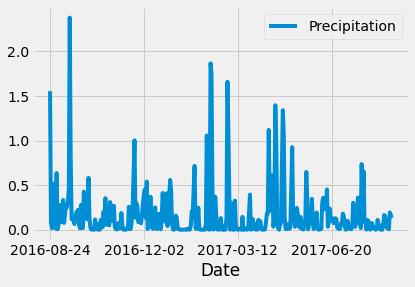

In [86]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_mean_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
x_axis = np.arange(len(prcp_mean_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, prcp_mean_df["Date"], rotation="vertical")

# plt.bar
# plt.tight_layout()
# plt.show()


# # Set x axis and tick locations

# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Exploratory Station Analysis

In [ ]:
# Query total number of stations in dataset


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.


In [ ]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.


# Close session